In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
adv_mul=pd.read_csv("advertising.csv")
adv_mul

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
adv_mul.shape

(200, 4)

In [4]:
adv_mul.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
adv_mul.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,9.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
adv_mul.sample(10)

,TV,Radio,Newspaper,Sales
192,17.2,4.1,31.6,5.9
8,8.6,2.1,1.0,4.8
145,140.3,1.9,9.0,10.3
28,248.8,27.1,22.9,18.9
3,151.5,41.3,58.5,18.5
97,184.9,21.0,22.0,15.5
180,156.6,2.6,8.3,10.5
10,66.1,5.8,24.2,8.6
170,50.0,11.6,18.4,8.4
85,193.2,18.4,65.7,15.2


In [7]:
adv_mul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
adv_mul.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
adv_mul.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [10]:
adv_mul.corr(method="spearman")

,TV,Radio,Newspaper,Sales
TV,1.000000,0.056123,0.050840,0.800614
Radio,0.056123,1.000000,0.316979,0.554304
Newspaper,0.050840,0.316979,1.000000,0.194922
Sales,0.800614,0.554304,0.194922,1.000000


In [12]:
import seaborn as sns

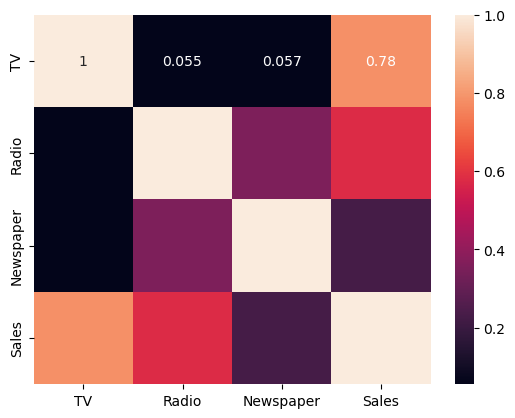

In [13]:
dataplot=sns.heatmap(adv_mul.corr(),annot=True)

In [11]:
adv_mul.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## 2. Visualizing Data

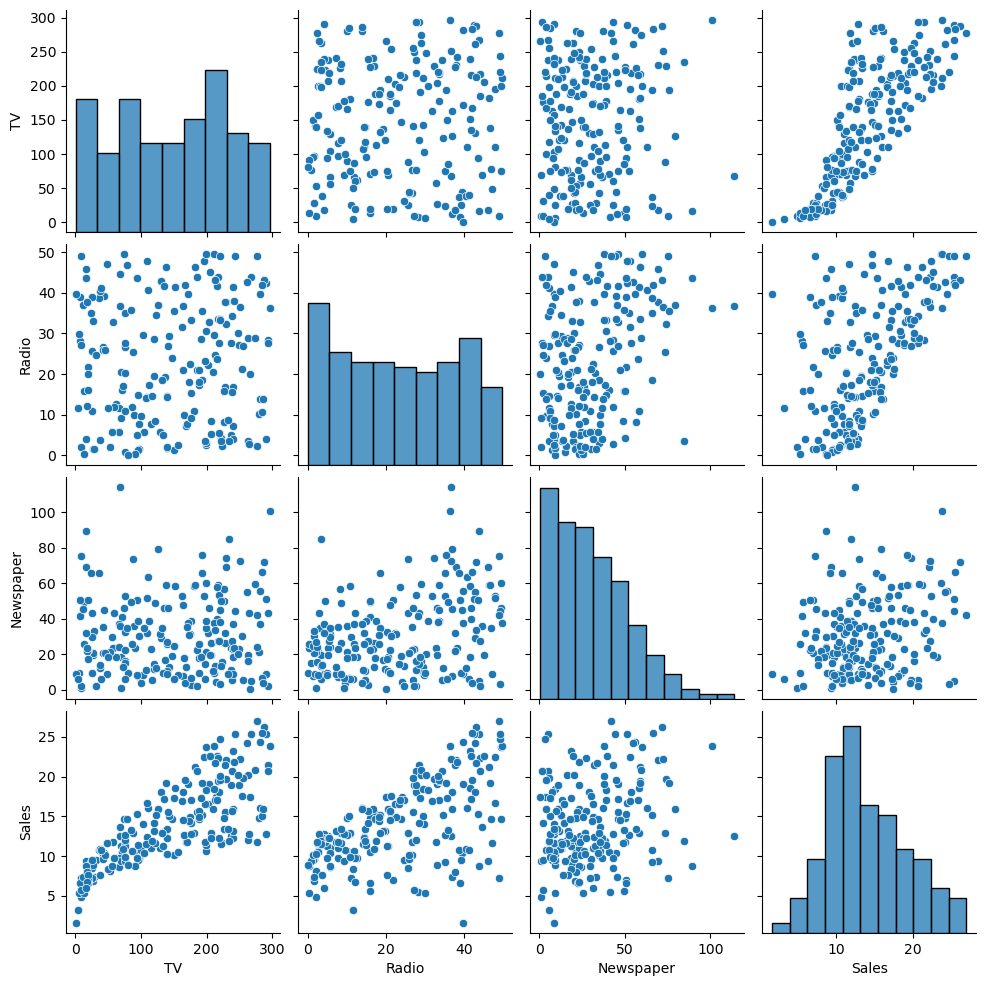

In [14]:
sns.pairplot(adv_mul)

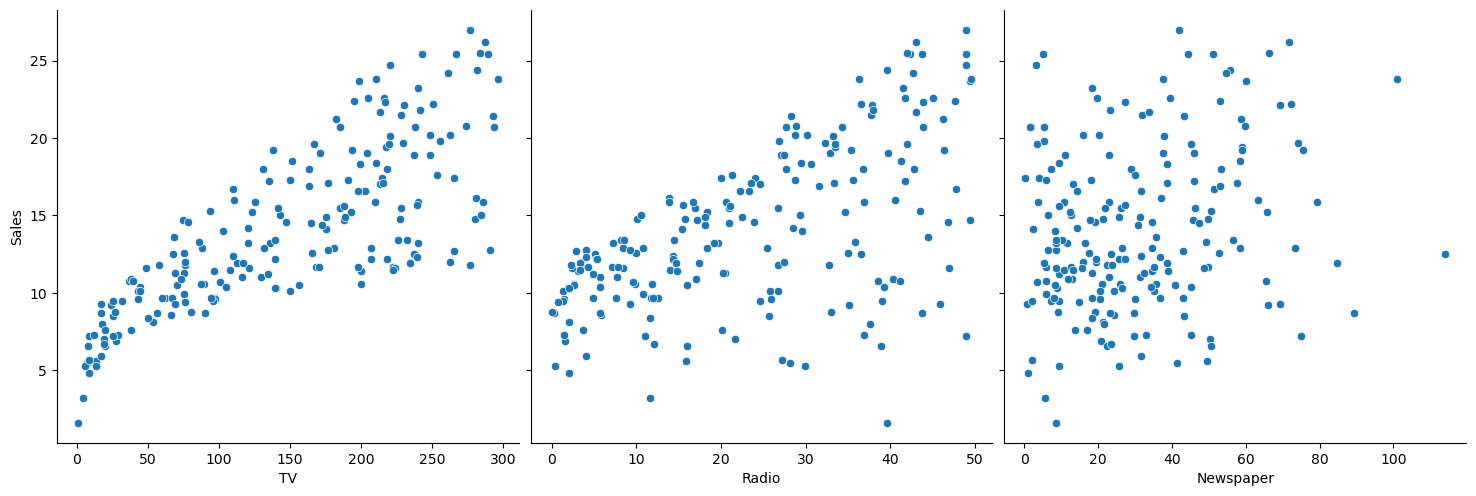

In [15]:
sns.pairplot(adv_mul,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter',size=5)

### 3. Splitting the Data Set

In [16]:
from sklearn.model_selection import train_test_split as tts

In [17]:
x=adv_mul[['TV','Radio','Newspaper']] #It will be in a Matrix Format which is because it was one row and multiple columns
y=adv_mul['Sales'] # It will be in a Vector format which is 

### Calculating multicollinarity 

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [19]:
vif=[]

In [20]:
times=x.shape[1]

In [21]:
for i in range(times):
    vif.append(vf(x,i))

In [23]:
print(vif)

[2.486771835198193, 3.2854621001628947, 3.0552445106573853]


In [24]:
X_train,x_test,y_train,y_test=tts(x,y,train_size=0.75)

In [25]:
vif2=[]

In [26]:
times=X_train.shape[1]
times

3

In [27]:
for i in range(times):
    vif2.append(vf(X_train,i))

In [28]:
vif2

[2.490995029602878, 3.0635725763733026, 2.748664157516596]

In [29]:
X_train.shape

(150, 3)

In [30]:
x_test.shape

(50, 3)

In [31]:
y_train.shape

(150,)

In [32]:
y_test.shape

(50,)

### 4. Creating a Linear Model 

In [33]:
from sklearn.linear_model import LinearRegression as lr

In [34]:
obj=lr()

In [35]:
obj.fit(X_train,y_train)

LinearRegression()

In [36]:
obj.coef_

array([ 0.04600655,  0.19078249, -0.00327141])

In [37]:
obj.intercept_

2.957786994626387

In [38]:
X_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [39]:
coef_df=pd.DataFrame(obj.coef_,X_train.columns,columns=['Coefficent (m1,m2,m3)'])
coef_df

,"Coefficent (m1,m2,m3)"
TV,0.046007
Radio,0.190782
Newspaper,-0.003271


###  5. Prediciting the values

In [40]:
y_pred=obj.predict(x_test) 


### 6. Evaluation Metrics or Cost Function 

In [41]:
from sklearn.metrics import mean_squared_error as mse
import numpy as np

In [42]:
msev=mse(y_test,y_pred)
rmse=np.sqrt(msev)

In [43]:
print("Mean Square Error ",msev)
print("Root Mean Square Error: ",rmse)

Mean Square Error  2.2007537910844235
Root Mean Square Error:  1.483493778579615


### 7. Calculating R^2 Value(Changes of Determinent) 

In [44]:
from sklearn.metrics import r2_score as r

In [45]:
r2val=r(y_test,y_pred)

In [47]:
print("r2_Value: ",r2val)

r2_Value:  0.9259677082486373


### 8. Calculating the Adjusted R2

In [51]:
n=X_train.shape[0]
n

150

In [52]:
p=X_train.shape[1]
p

3

In [53]:
num=(1-r2val)*(n-1)
num

11.030811470953045

In [54]:
denom=(n-p-1)
denom

146

In [55]:
adj_r2=1-(num/denom)
adj_r2

0.9244464967742942

### Calculating residuals for normality 

In [128]:
residual=y_test-y_pred

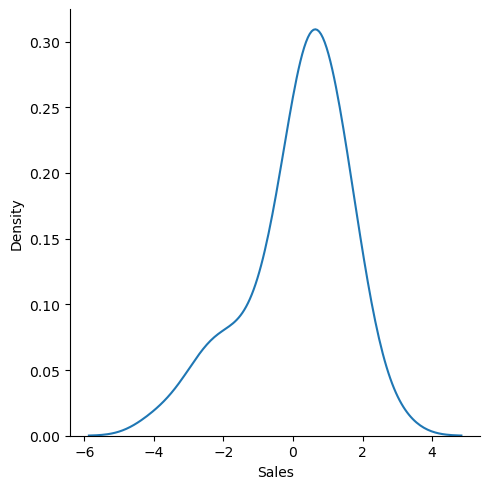

In [131]:
sns.displot(residual,kind='kde')

### Homoscedacity- the resudial and the value should be uniform 

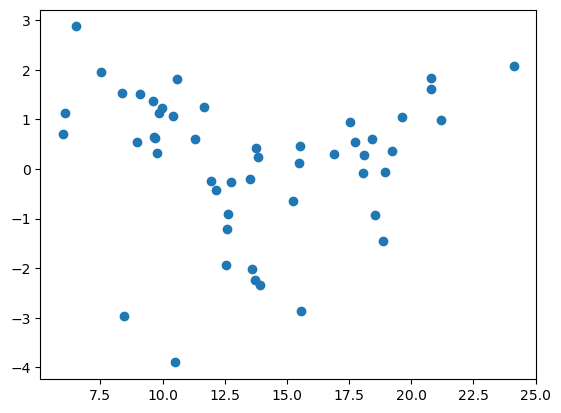

In [132]:
plt.scatter(y_pred,residual)

#### Since Newspaper's Conversion rate is low so we remove newspaper to check for conversion 

<Axes: >

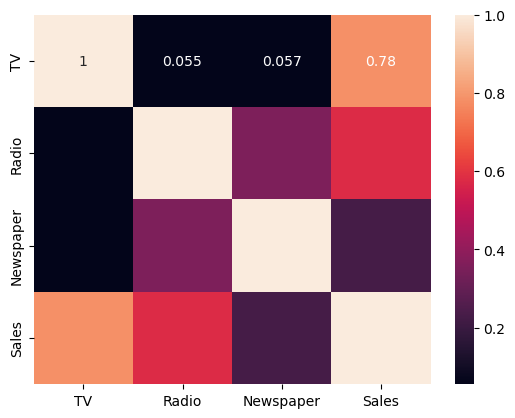

In [36]:
sns.heatmap(adv_mul.corr(),annot=True)

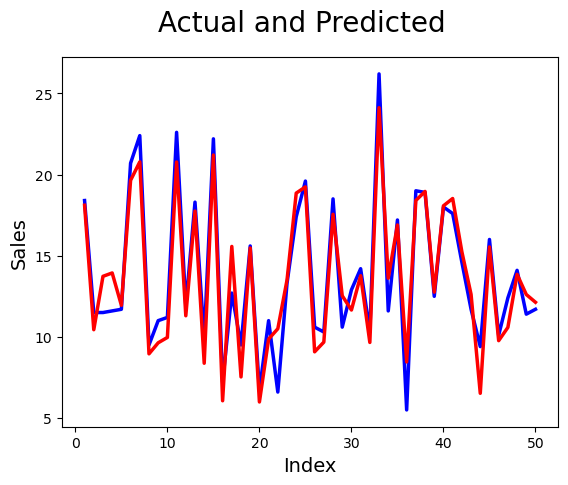

In [38]:
import matplotlib.pyplot as plt
c=[i for i in range(1,51,1)]
fig=plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

### Error Rates over 3 features

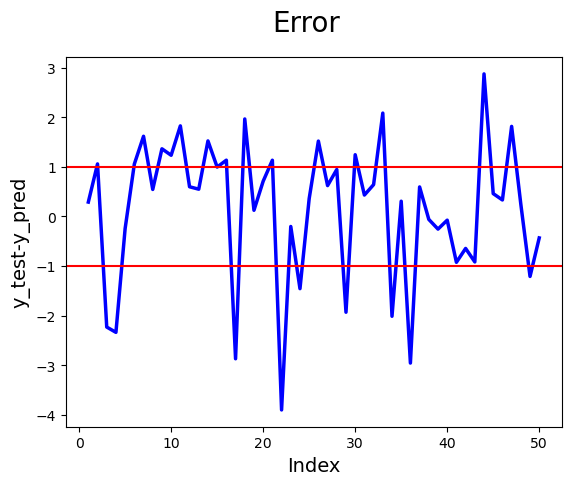

In [46]:
import matplotlib.pyplot as plt
c=[i for i in range(1,51,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.axhline(y = 1, color = 'r')
plt.axhline(y=-1,color='r')
fig.suptitle('Error', fontsize=20)
plt.xlabel('Index', fontsize=14)
plt.ylabel('y_test-y_pred', fontsize=14)
plt.show()

### 8. Removing or taking on the Newspaper column from the train test split

In [39]:
new_x_train=X_train[['TV','Radio']]
new_x_test=x_test[['TV','Radio']]

In [41]:
obj1=lr()

In [43]:
obj.fit(new_x_train,y_train)

LinearRegression()

In [44]:
obj.coef_

array([0.04642612, 0.18416442])

In [46]:
obj.intercept_

2.80333929432682

In [47]:
y_pred2=obj.predict(new_x_test)

In [49]:
mse2=mse(y_test,y_pred2)
rmse=np.sqrt(mse2)
print(mse2)
print(rmse)

1.94657631138092
1.3951975886522023


In [54]:
r2val2=r(y_test,y_pred2)
r2val2

0.938856658002936

### Actual and Predicted 

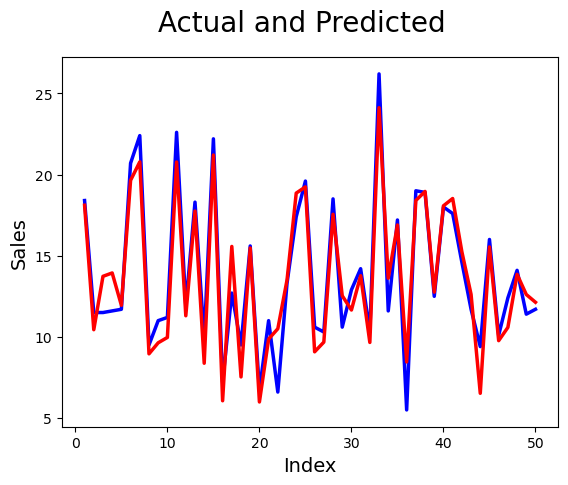

In [47]:
import matplotlib.pyplot as plt
c=[i for i in range(1,51,1)]
fig=plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()

### Error or Residual  

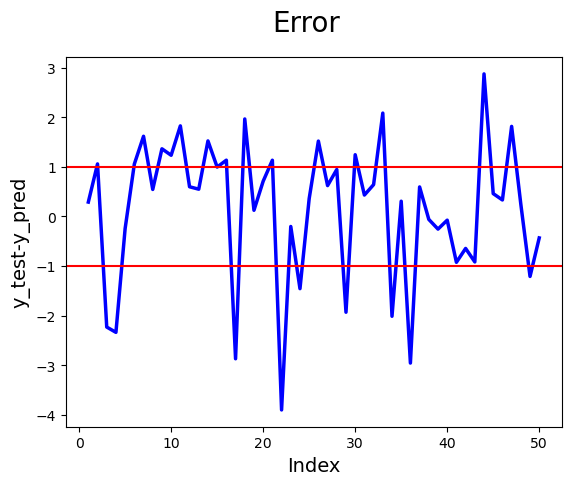

In [48]:
import matplotlib.pyplot as plt
c=[i for i in range(1,51,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.axhline(y = 1, color = 'r')
plt.axhline(y=-1,color='r')
fig.suptitle('Error', fontsize=20)
plt.xlabel('Index', fontsize=14)
plt.ylabel('y_test-y_pred', fontsize=14)
plt.show()

## Removing a features unnecessary is a concern so we need to provide a reason to remove a feature 
### In this scenario lets consider newspaper and sales for the data


In [90]:
unx=adv_mul[['Newspaper']]
uny=adv_mul[['Sales']]

In [91]:
unX_train,unx_test,unY_train,uny_test=tts(unx,uny,train_size=0.75)

In [92]:
unX_train=np.reshape(unX_train,[-1,1])
unx_test=np.reshape(unx_test,[-1,1])

In [93]:
unX_train.shape

(150, 1)

In [94]:
unY_train.shape

(150, 1)

In [95]:
uny_test.shape

(50, 1)

In [96]:
unx_test.shape

(50, 1)

In [97]:
obj2=lr()

In [98]:
obj2.fit(unX_train,unY_train)

LinearRegression()

In [99]:
obj2.coef_

array([[0.06489926]])

In [100]:
obj2.intercept_

array([11.9583459])

In [101]:
uny_pred=obj2.predict(unx_test)

In [104]:
mseun=mse(uny_test,uny_pred)
rmseun=np.sqrt(mseun)
print("MSE of UN",mseun)
print("RMSE of UN",rmseun)

MSE of UN 21.192822584394712
RMSE of UN 4.603566289779557


In [105]:
unrval=r(uny_test,uny_pred)
unrval

-0.028979795081845783